# **Fine tuning Stable Diffusion model**
Please refer to the respective sections in the book for further details.


## **Step 1. Installing libraries and Data Loading**

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks")
print(os.listdir())

['flickr8k.zip', 'midjourney-texttoimage.zip', 'benali_image.jpg', 'upsampled_cat.png', "shivam's notebooks", 'Images', 'flicker_8k', 'Copy of captions.txt', 'mid_journey_data', 'best.pt', 'diffusers', 'sd-pokemon-model', 'sd-pokemon-model-lora', 'wandb', '=0.16.0', '=4.25.1', 'yoda-pokemon.png', 'Chapter 2, 3 & 4 ', 'cow_moo.wav', 'Text to audio - CLAP implementation', 'sample_audio.wav', 'Whisper implementation - common voice dataset', 'fine tuning Whisper implementation - common voice dataset', 'Speech T5 fine tuning', 'Speech T5 implementation', 'Text to video on pre-trained.ipynb', 'Text to video fine tuning.ipynb', 'Copy of Text-To-Video-Finetuning.ipynb', 'chapter 3 code 1 -  CLIP', 'unused files', 'chapter 3 code 2 - diffusion model from scratch', 'chapter 3 code 3 -  pre trained diffusion mode', 'chapter 3 code 4 -  fine tuning Stable Diffusion model']


In [ ]:
!git clone https://github.com/huggingface/diffusers

fatal: destination path 'diffusers' already exists and is not an empty directory.


In [ ]:
!pip install accelerate>=0.16.0
!pip install torchvision
!pip install datasets
!pip install ftfy
!pip install tensorboard
!pip install diffusers
!pip install diffusers["torch"] transformers
!pip install transformers -U
!pip install wandb
!pip install export

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 55.4 MB/s eta 0:00:00
  

In [ ]:
!accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
os.environ['MODEL_NAME'] = "CompVis/stable-diffusion-v1-4"
os.environ['DATASET_NAME'] = "m1guelpf/nouns"

## **Step 2. Model Training**

In [ ]:
!accelerate launch --mixed_precision="fp16"  diffusers/examples/text_to_image/train_text_to_image.py \
  --pretrained_model_name_or_path={os.environ['MODEL_NAME']} \
  --dataset_name={os.environ['DATASET_NAME']} \
  --use_ema \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --max_train_steps=10000 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --lr_scheduler="constant" --lr_warmup_steps=500 \
  --output_dir="fine-tuned-diffusion-model"

2024-02-19 01:20:35.132732: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 01:20:35.132790: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 01:20:35.134187: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-19 01:20:36.370418: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
02/19/2024 01:20:37 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'timestep_spacing', 'rescale_betas_zero_snr', 'clip_sample_range', 'predi

## **Step 3. Model Inference**

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_path = "fine-tuned-diffusion-model"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

image = pipe(prompt="a pixel art character with square dark green glasses, a film strip-shaped head and a yellow-colored body on a warm background").images[0]
image.save("output_from_fine_tuned_diffusion_model.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

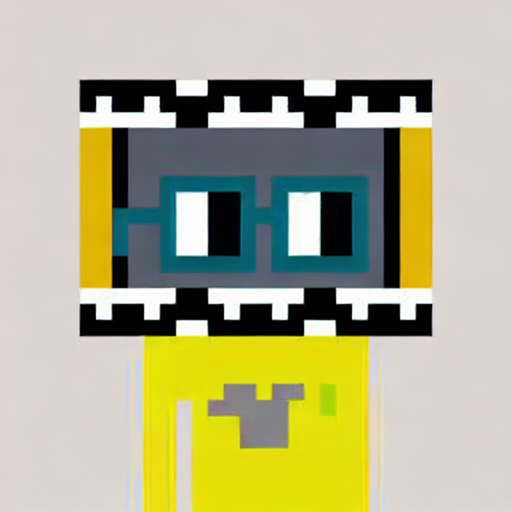

In [ ]:
image